# Simulations

In [61]:
# Setup requirements
import numpy as np
import matplotlib.pyplot as plt
import sigpy as sp
import sigpy.mri as mri
import nibabel as nib
from scipy.io import loadmat
from scipy.io import savemat
from skimage.metrics import structural_similarity

# 1. Data

In [62]:
GT = nib.load('test_image.nii.gz').get_fdata()[160,:,:]

Shape:(512, 512)
Type: float64
Range: [0.0, 5710.0]


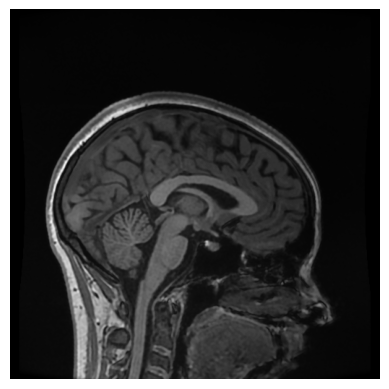

In [63]:
print('Shape:' + str(GT.shape))
print('Type: ' + str(GT.dtype))
print('Range: ' + str([np.min(GT), np.max(GT)]))
plt.imshow(np.rot90(GT), cmap='gray')
plt.axis('off')
plt.show()

# 2. Recon
We will geenrate 3 data sets:
1. Fully sampled (noise added)
2. Undersampled 1 (R=4 undersampled version of 1)
3. Undersampled 2 (R=4 undersampled version of 1, but different mask than 2)
3. Undersampled 3 (R=4 undersampled version of 1, but different mask than 2 and 3)
3. Undersampled 4 (R=4 undersampled version of 1, but different mask than 2, 3 and 4)

In [64]:
np.random.seed(0)
nse = 10*(np.random.randn(GT.shape[0], GT.shape[1])+ 1j*np.random.randn(GT.shape[0], GT.shape[1]))
k_full = sp.fft(GT,axes=(0,1)) + nse
msk1 = mri.poisson(GT.shape, 4, seed=0, tol=0.1)
msk2 = mri.poisson(GT.shape, 4, seed=1, tol=0.1)
msk3 = mri.poisson(GT.shape, 4, seed=2, tol=0.1)
msk4 = mri.poisson(GT.shape, 4, seed=3, tol=0.1)
k_us_1 = k_full*msk1
k_us_2 = k_full*msk2
k_us_3 = k_full*msk3
k_us_4 = k_full*msk4

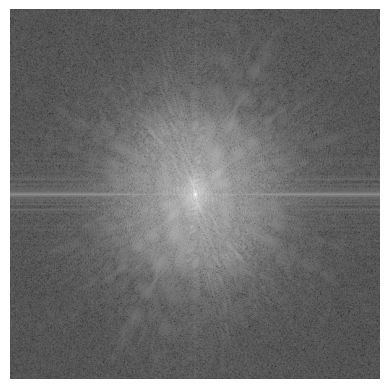

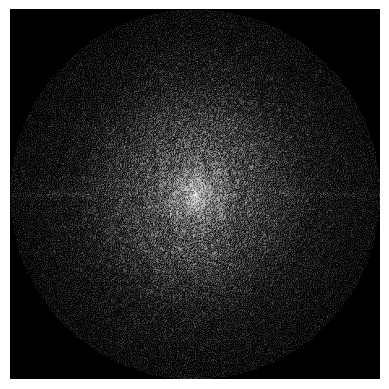

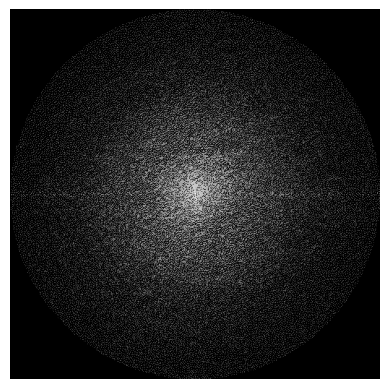

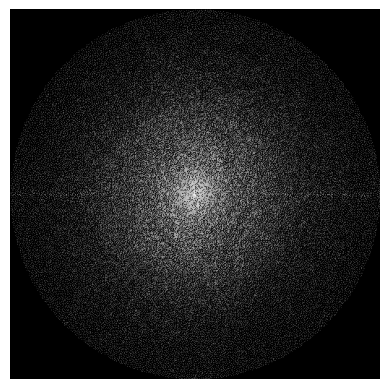

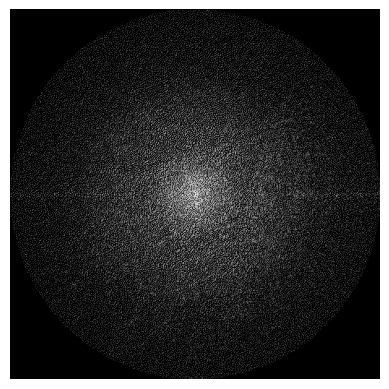

In [65]:
plt.imshow(np.log(np.abs(k_full)+0.1), cmap='gray',vmin=-2,vmax=12)
plt.axis('off')
plt.show()
plt.imshow(np.log(np.abs(k_us_1)+0.1), cmap='gray',vmin=-2,vmax=12)
plt.axis('off')
plt.show()
plt.imshow(np.log(np.abs(k_us_2)+0.1), cmap='gray',vmin=-2,vmax=12)
plt.axis('off')
plt.show()
plt.imshow(np.log(np.abs(k_us_3)+0.1), cmap='gray',vmin=-2,vmax=12)
plt.axis('off')
plt.show()
plt.imshow(np.log(np.abs(k_us_4)+0.1), cmap='gray',vmin=-2,vmax=12)
plt.axis('off')
plt.show()

... Now we will reconstruct all data using zero-filled iFFT

In [66]:
recon_full_ifft = np.abs(sp.ifft(k_full))
recon_us1_ifft = np.abs(sp.ifft(k_us_1))
recon_us2_ifft = np.abs(sp.ifft(k_us_2))
recon_us3_ifft = np.abs(sp.ifft(k_us_3))
recon_us4_ifft = np.abs(sp.ifft(k_us_4))

Shape:(512, 512)
Type: float64
Range: [0.10354506542075742, 5683.83514145652]


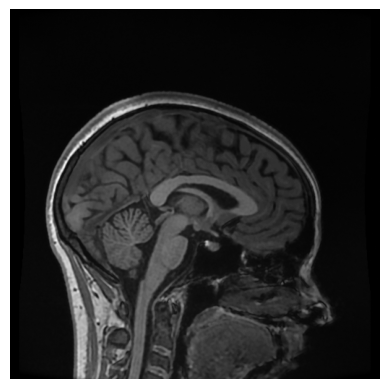

Shape:(512, 512)
Type: float64
Range: [1.0047467158846246, 4348.875425183643]


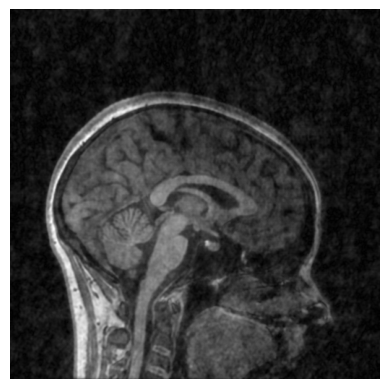

Shape:(512, 512)
Type: float64
Range: [1.2556259263072769, 4413.9122964685985]


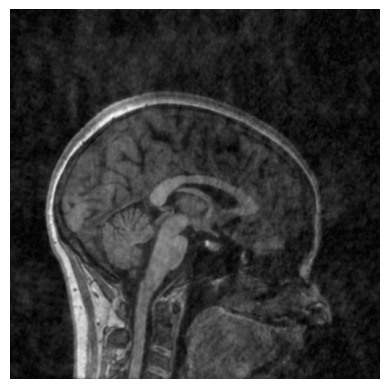

Shape:(512, 512)
Type: float64
Range: [1.542335010283158, 4290.501773323848]


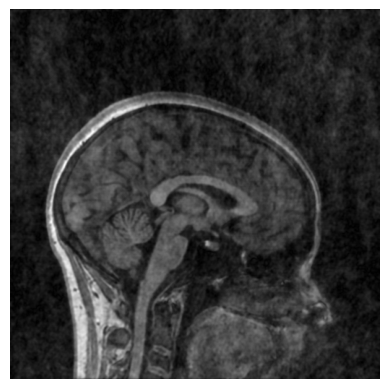

Shape:(512, 512)
Type: float64
Range: [0.8869094262572701, 4075.8920860950475]


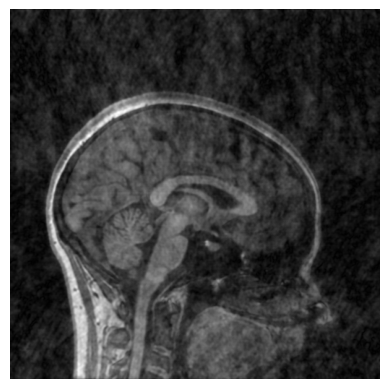

In [67]:
print('Shape:' + str(recon_full_ifft.shape))
print('Type: ' + str(recon_full_ifft.dtype))
print('Range: ' + str([np.min(recon_full_ifft), np.max(recon_full_ifft)]))
plt.imshow(np.rot90(recon_full_ifft), cmap='gray')
plt.axis('off')
plt.show()

print('Shape:' + str(recon_us1_ifft.shape))
print('Type: ' + str(recon_us1_ifft.dtype))
print('Range: ' + str([np.min(recon_us1_ifft), np.max(recon_us1_ifft)]))
plt.imshow(np.rot90(recon_us1_ifft), cmap='gray')
plt.axis('off')
plt.show()

print('Shape:' + str(recon_us2_ifft.shape))
print('Type: ' + str(recon_us2_ifft.dtype))
print('Range: ' + str([np.min(recon_us2_ifft), np.max(recon_us2_ifft)]))
plt.imshow(np.rot90(recon_us2_ifft), cmap='gray')
plt.axis('off')
plt.show()

print('Shape:' + str(recon_us3_ifft.shape))
print('Type: ' + str(recon_us3_ifft.dtype))
print('Range: ' + str([np.min(recon_us3_ifft), np.max(recon_us3_ifft)]))
plt.imshow(np.rot90(recon_us3_ifft), cmap='gray')
plt.axis('off')
plt.show()

print('Shape:' + str(recon_us4_ifft.shape))
print('Type: ' + str(recon_us4_ifft.dtype))
print('Range: ' + str([np.min(recon_us4_ifft), np.max(recon_us4_ifft)]))
plt.imshow(np.rot90(recon_us4_ifft), cmap='gray')
plt.axis('off')
plt.show()

# 3. Compare SSIM (explore data scaling and data type)


## 3.1. no scaling

In [68]:
full_ssim_0 = structural_similarity(GT,np.abs(recon_full_ifft))
print('Full : ' + str(full_ssim_0))

us1_ssim_0 = structural_similarity(GT,np.abs(recon_us1_ifft))
print('Undersampled 1 : ' + str(us1_ssim_0))

us2_ssim_0 = structural_similarity(GT,np.abs(recon_us2_ifft))
print('Undersampled 2 : ' + str(us2_ssim_0))

us3_ssim_0 = structural_similarity(GT,np.abs(recon_us3_ifft))
print('Undersampled 3 : ' + str(us3_ssim_0))

us4_ssim_0 = structural_similarity(GT,np.abs(recon_us4_ifft))
print('Undersampled 4 : ' + str(us4_ssim_0))

Full : 0.7003328435219747
Undersampled 1 : 0.3517385322051473
Undersampled 2 : 0.3297321694453314
Undersampled 3 : 0.3301248648797991
Undersampled 4 : 0.3067416736355256


## 3.2. scaled result

In [89]:
full_ssim_1 = structural_similarity(GT/np.max(GT.ravel()),recon_full_ifft/np.max(recon_full_ifft.ravel()))
print('Full : ' + str(full_ssim_1))

(us1_ssim_1,S) = structural_similarity(GT/np.max(GT.ravel()),recon_us1_ifft/np.max(recon_us1_ifft.ravel()),full=True)
print('Undersampled 1 : ' + str(us1_ssim_1))

us2_ssim_1 = structural_similarity(GT/np.max(GT.ravel()),recon_us2_ifft/np.max(recon_us2_ifft.ravel()))
print('Undersampled 2 : ' + str(us2_ssim_1))

us3_ssim_1 = structural_similarity(GT/np.max(GT.ravel()),recon_us3_ifft/np.max(recon_us3_ifft.ravel()))
print('Undersampled 3 : ' + str(us3_ssim_1))

us4_ssim_1 = structural_similarity(GT/np.max(GT.ravel()),recon_us4_ifft/np.max(recon_us4_ifft.ravel()))
print('Undersampled 4 : ' + str(us4_ssim_1))

Full : 0.9987904761630141
Undersampled 1 : 0.7296334660485884
Undersampled 2 : 0.6627278768735868
Undersampled 3 : 0.6439188820770921
Undersampled 4 : 0.629322274415469


In [90]:
full_ssim_2 = structural_similarity(GT/np.median(GT.ravel()),recon_full_ifft/np.median(recon_full_ifft.ravel()))
print('Full : ' + str(full_ssim_2))

us1_ssim_2 = structural_similarity(GT/np.median(GT.ravel()),recon_us1_ifft/np.median(recon_us1_ifft.ravel()))
print('Undersampled 1 : ' + str(us1_ssim_2))

us2_ssim_2 = structural_similarity(GT/np.median(GT.ravel()),recon_us2_ifft/np.median(recon_us2_ifft.ravel()))
print('Undersampled 2 : ' + str(us2_ssim_2))

us3_ssim_2 = structural_similarity(GT/np.median(GT.ravel()),recon_us3_ifft/np.median(recon_us3_ifft.ravel()))
print('Undersampled 3 : ' + str(us3_ssim_2))

us4_ssim_2 = structural_similarity(GT/np.median(GT.ravel()),recon_us4_ifft/np.median(recon_us4_ifft.ravel()))
print('Undersampled 4 : ' + str(us4_ssim_2))

Full : 0.8545974702724071
Undersampled 1 : 0.26839116871731006
Undersampled 2 : 0.20822638671416183
Undersampled 3 : 0.19925739081324054
Undersampled 4 : 0.18760620728279004


## 3.3. Change data type

In [91]:
full_ssim_3 = structural_similarity(GT.astype(np.uint8),(recon_full_ifft).astype(np.uint8))
print('Full : ' + str(full_ssim_3))

us1_ssim_3 = structural_similarity(GT.astype(np.uint8),(recon_us1_ifft).astype(np.uint8))
print('Undersampled 1 : ' + str(us1_ssim_3))

us2_ssim_3 = structural_similarity(GT.astype(np.uint8),(recon_us2_ifft).astype(np.uint8))
print('Undersampled 2 : ' + str(us2_ssim_3))

us3_ssim_3 = structural_similarity(GT.astype(np.uint8),(recon_us3_ifft).astype(np.uint8))
print('Undersampled 3 : ' + str(us3_ssim_3))

us4_ssim_3 = structural_similarity(GT.astype(np.uint8),(recon_us4_ifft).astype(np.uint8))
print('Undersampled 4 : ' + str(us4_ssim_3))

Full : 0.6766756909716198
Undersampled 1 : 0.008482226295648711
Undersampled 2 : 0.010438864980605837
Undersampled 3 : 0.007024866379928868
Undersampled 4 : 0.008865921345691856


In [92]:
full_ssim_4 = structural_similarity(GT.astype(np.uint16),(recon_full_ifft).astype(np.uint16))
print('Full : ' + str(full_ssim_4))

us1_ssim_4 = structural_similarity(GT.astype(np.uint16),(recon_us1_ifft).astype(np.uint16))
print('Undersampled 1 : ' + str(us1_ssim_4))

us2_ssim_4 = structural_similarity(GT.astype(np.uint16),(recon_us2_ifft).astype(np.uint16))
print('Undersampled 2 : ' + str(us2_ssim_4))

us3_ssim_4 = structural_similarity(GT.astype(np.uint16),(recon_us3_ifft).astype(np.uint16))
print('Undersampled 3 : ' + str(us3_ssim_4))

us4_ssim_4 = structural_similarity(GT.astype(np.uint16),(recon_us4_ifft).astype(np.uint16))
print('Undersampled 4 : ' + str(us4_ssim_4))

Full : 0.9999580259144012
Undersampled 1 : 0.9629001247815645
Undersampled 2 : 0.9190238248671716
Undersampled 3 : 0.8995302920613499
Undersampled 4 : 0.9114497507013318


# 4. Compare SSIM (compare MATLAB and python versions)

In [110]:
savemat('recons.mat', {"GT" : GT, "recon_full_ifft" : recon_full_ifft, "recon_us1_ifft" : recon_us1_ifft, "recon_us2_ifft" : recon_us2_ifft,"recon_us3_ifft" : recon_us3_ifft,"recon_us4_ifft" : recon_us4_ifft})
!/usr/local/MATLAB/R2019a/bin/matlab -nodisplay -r "ssim_in_matlab; quit"
mat = loadmat('ssim_matlab.mat')

=
                            < M A T L A B (R) >
                  Copyright 1984-2019 The MathWorks, Inc.
              R2019a Update 9 (9.6.0.1472908) 64-bit (glnxa64)
                             September 2, 2020

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
No scaling:
Full : 0.67378
Undersampled 1 : 0.33703
Undersampled 2 : 0.31561
Undersampled 3 : 0.31609
Undersampled 4 : 0.29405
--------------------------------------------------
Scaled by max:
Full : 0.99509
Undersampled 1 : 0.63682
Undersampled 2 : 0.57748
Undersampled 3 : 0.56333
Undersampled 4 : 0.54259
--------------------------------------------------
Scaled by median:
Full : 0.75182
Undersampled 1 : 0.22718
Undersampled 2 : 0.16437
Undersampled 3 : 0.15613
Undersampled 4 : 0.14567
--------------------------------------------------
Change to uint 8:
Full : 0.75864
Undersampled 1 : 0.51896
Undersampled 2 : 0.59096
Undersampled 3 : 0.59006
Undersampled 4 : 0.57674
------------------------

## 5. Make figures

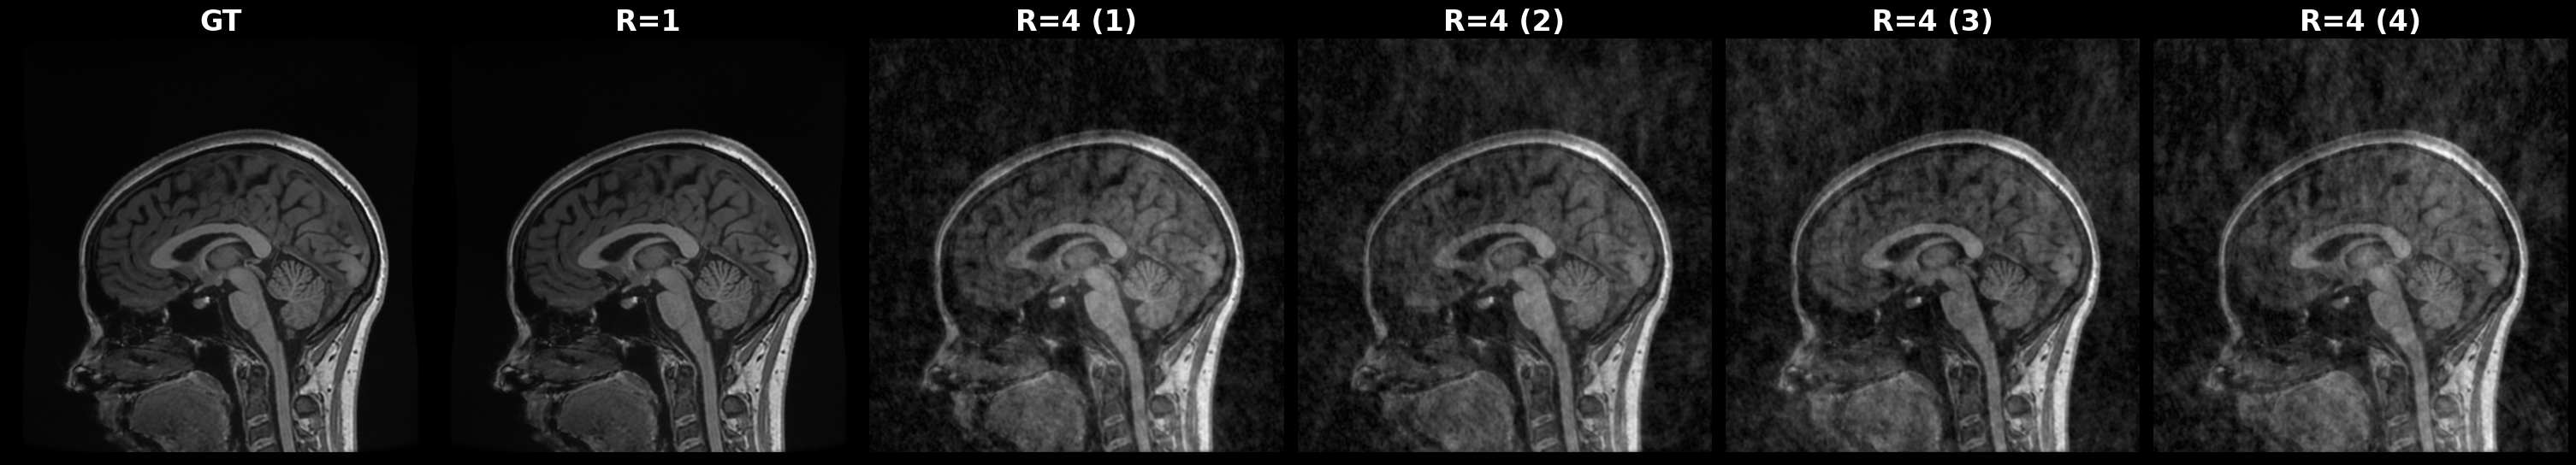

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(30, 10),constrained_layout=True)


axs[0].imshow(np.rot90(np.squeeze(GT).T,k=2) , cmap="gray")
axs[0].set_title('GT',color='w',fontsize=24,fontweight="bold")

axs[1].imshow(np.rot90(np.squeeze(recon_full_ifft).T,k=2) , cmap="gray")
axs[1].set_title('R=1',color='w',fontsize=24,fontweight="bold")

axs[2].imshow(np.rot90(np.squeeze(recon_us1_ifft).T,k=2) , cmap="gray")
axs[2].set_title('R=4 (1)',color='w',fontsize=24,fontweight="bold")

axs[3].imshow(np.rot90(np.squeeze(recon_us2_ifft).T,k=2) , cmap="gray")
axs[3].set_title('R=4 (2)',color='w',fontsize=24,fontweight="bold")

axs[4].imshow(np.rot90(np.squeeze(recon_us3_ifft).T,k=2) , cmap="gray")
axs[4].set_title('R=4 (3)',color='w',fontsize=24,fontweight="bold")

axs[5].imshow(np.rot90(np.squeeze(recon_us4_ifft).T,k=2) , cmap="gray")
axs[5].set_title('R=4 (4)',color='w',fontsize=24,fontweight="bold")



for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

fig.patch.set_facecolor('black')

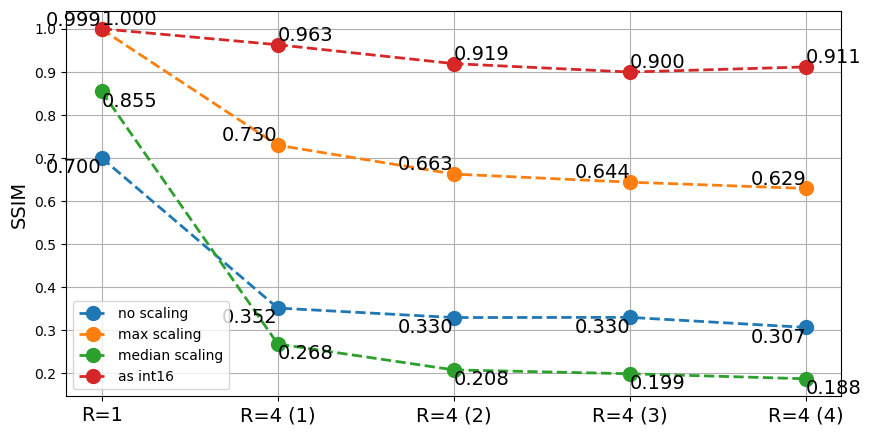

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))


axs.plot((full_ssim_0, us1_ssim_0,us2_ssim_0,us3_ssim_0,us4_ssim_0,),marker='.',markersize=20,linewidth=2,linestyle='--')
axs.plot((full_ssim_1, us1_ssim_1,us2_ssim_1,us3_ssim_1,us4_ssim_1,),marker='.',markersize=20,linewidth=2,linestyle='--')
axs.plot((full_ssim_2, us1_ssim_2,us2_ssim_2,us3_ssim_2,us4_ssim_2,),marker='.',markersize=20,linewidth=2,linestyle='--')
#axs.plot((full_ssim_3, us1_ssim_3,us2_ssim_3,us3_ssim_3,us4_ssim_3,),marker='.',markersize205,linewidth=,linestyle='--'2)
axs.plot((full_ssim_4, us1_ssim_4,us2_ssim_4,us3_ssim_4,us4_ssim_4,),marker='.',markersize=20,linewidth=2,linestyle='--')

#axs.plot((mat['full_ssim_0'][0][0], mat['us1_ssim_0'][0][0],mat['us2_ssim_0'][0][0],mat['us3_ssim_0'][0][0],mat['us4_ssim_0'][0][0]),marker='.',markersize=15,linewidth=2)
#axs.plot((mat['full_ssim_1'][0][0], mat['us1_ssim_1'][0][0],mat['us2_ssim_1'][0][0],mat['us3_ssim_1'][0][0],mat['us4_ssim_1'][0][0]),marker='.',markersize=15,linewidth=2)
#axs.plot((mat['full_ssim_2'][0][0], mat['us1_ssim_2'][0][0],mat['us2_ssim_2'][0][0],mat['us3_ssim_2'][0][0],mat['us4_ssim_2'][0][0]),marker='.',markersize=15,linewidth=2)
##axs.plot((mat['full_ssim_3'][0][0], mat['us1_ssim_3'][0][0],mat['us2_ssim_3'][0][0],mat['us3_ssim_3'][0][0],mat['us4_ssim_3'][0][0]),marker='.',markersize=15,linewidth=2)
#axs.plot((mat['full_ssim_4'][0][0], mat['us1_ssim_4'][0][0],mat['us2_ssim_4'][0][0],mat['us3_ssim_4'][0][0],mat['us4_ssim_4'][0][0]),marker='.',markersize=15,linewidth=2)
ssim_list_0 = (full_ssim_0, us1_ssim_0,us2_ssim_0,us3_ssim_0,us4_ssim_0,)

ssim_list_1 = (full_ssim_1, us1_ssim_1,us2_ssim_1,us3_ssim_1,us4_ssim_1,)

ssim_list_2 = (full_ssim_2, us1_ssim_2,us2_ssim_2,us3_ssim_2,us4_ssim_2,)

ssim_list_4 = (full_ssim_4, us1_ssim_4,us2_ssim_4,us3_ssim_4,us4_ssim_4,)


for i in range(5):
    axs.annotate(f'{ssim_list_0[i]:.3f}', (i, ssim_list_0[i]),ha='right',va='top',fontsize=14)
    axs.annotate(f'{ssim_list_1[i]:.3f}', (i, ssim_list_1[i]),ha='right',va='bottom',fontsize=14)
    axs.annotate(f'{ssim_list_2[i]:.3f}', (i, ssim_list_2[i]),ha='left',va='top',fontsize=14)
    axs.annotate(f'{ssim_list_4[i]:.3f}', (i, ssim_list_4[i]),ha='left',va='bottom',fontsize=14)

axs.set_ylabel('SSIM', fontsize=14)
axs.legend(('no scaling','max scaling', 'median scaling', 'as int16','no scaling - matlab','max scaling - matlab', 'median scaling - matlab', 'as int16 - matlab'),loc='lower left')

axs.grid('minor')

axs.set_xticks([0,1,2,3,4], ('R=1', 'R=4 (1)', 'R=4 (2)', 'R=4 (3)', 'R=4 (4)'),fontsize = 14)


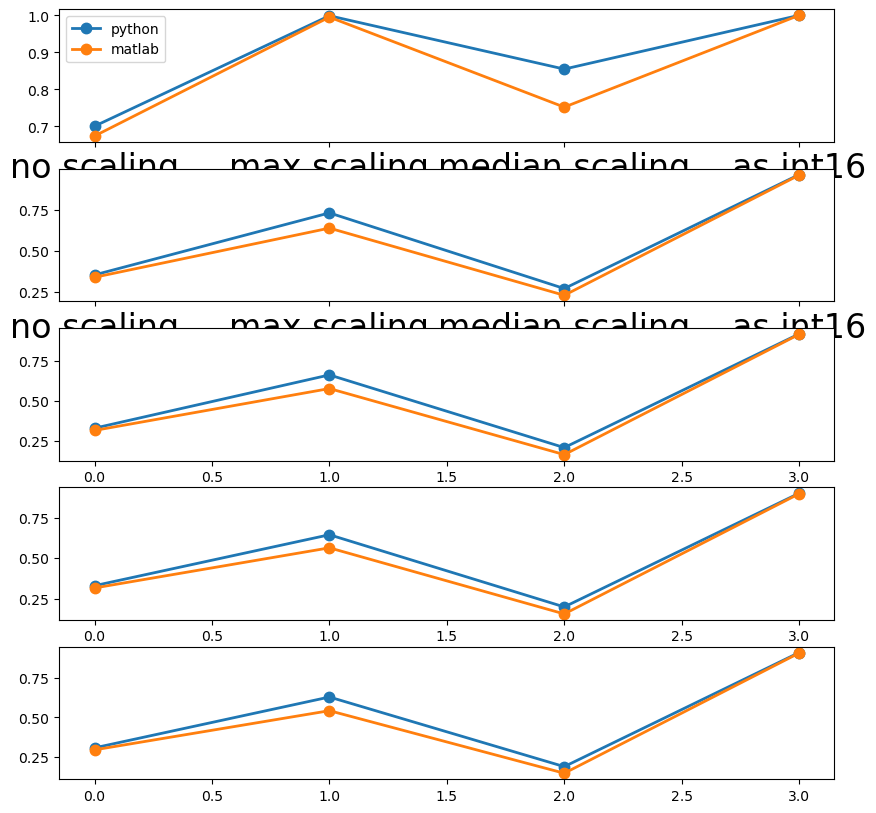

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10))


axs[0].plot((full_ssim_0, full_ssim_1,full_ssim_2,full_ssim_4,),marker='.',markersize=15,linewidth=2)
axs[0].plot((mat['full_ssim_0'][0][0], mat['full_ssim_1'][0][0],mat['full_ssim_2'][0][0],mat['full_ssim_4'][0][0]),marker='.',markersize=15,linewidth=2)

axs[1].plot((us1_ssim_0, us1_ssim_1,us1_ssim_2,us1_ssim_4),marker='.',markersize=15,linewidth=2)
axs[1].plot((mat['us1_ssim_0'][0][0], mat['us1_ssim_1'][0][0],mat['us1_ssim_2'][0][0],mat['us1_ssim_4'][0][0]),marker='.',markersize=15,linewidth=2)

axs[2].plot((us2_ssim_0, us2_ssim_1,us2_ssim_2,us2_ssim_4),marker='.',markersize=15,linewidth=2)
axs[2].plot((mat['us2_ssim_0'][0][0], mat['us2_ssim_1'][0][0],mat['us2_ssim_2'][0][0],mat['us2_ssim_4'][0][0]),marker='.',markersize=15,linewidth=2)

axs[3].plot((us3_ssim_0, us3_ssim_1,us3_ssim_2,us3_ssim_4),marker='.',markersize=15,linewidth=2)
axs[3].plot((mat['us3_ssim_0'][0][0], mat['us3_ssim_1'][0][0],mat['us3_ssim_2'][0][0],mat['us3_ssim_4'][0][0]),marker='.',markersize=15,linewidth=2)

axs[4].plot((us4_ssim_0, us4_ssim_1,us4_ssim_2,us4_ssim_4),marker='.',markersize=15,linewidth=2)
axs[4].plot((mat['us4_ssim_0'][0][0], mat['us4_ssim_1'][0][0],mat['us4_ssim_2'][0][0],mat['us4_ssim_4'][0][0]),marker='.',markersize=15,linewidth=2)



axs[0].legend(('python','matlab'))

#axs.grid('minor')

axs[0].set_xticks([0,1,2,3], ('no scaling','max scaling', 'median scaling', 'as int16'),fontsize = 24)

axs[1].set_xticks([0,1,2,3], ('no scaling','max scaling', 'median scaling', 'as int16'),fontsize = 24)

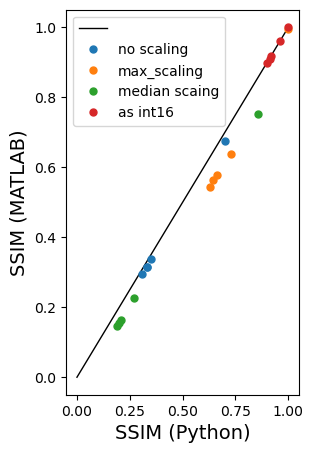

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(3, 5))

axs.plot([0,1],[0,1],linewidth=1,color='k')
axs.plot(( full_ssim_0, us1_ssim_0, us2_ssim_0,us3_ssim_0,us4_ssim_0),(mat['full_ssim_0'][0][0], mat['us1_ssim_0'][0][0], mat['us2_ssim_0'][0][0],mat['us3_ssim_0'][0][0],mat['us4_ssim_0'][0][0]),markersize=10,marker='.',linestyle='')
axs.plot(( full_ssim_1, us1_ssim_1, us2_ssim_1,us3_ssim_1,us4_ssim_1),(mat['full_ssim_1'][0][0], mat['us1_ssim_1'][0][0], mat['us2_ssim_1'][0][0],mat['us3_ssim_1'][0][0],mat['us4_ssim_1'][0][0]),markersize=10,marker='.',linestyle='')
axs.plot(( full_ssim_2, us1_ssim_2, us2_ssim_2,us3_ssim_2,us4_ssim_2),(mat['full_ssim_2'][0][0], mat['us1_ssim_2'][0][0], mat['us2_ssim_2'][0][0],mat['us3_ssim_2'][0][0],mat['us4_ssim_2'][0][0]),markersize=10,marker='.',linestyle='')
axs.plot(( full_ssim_4, us1_ssim_4, us2_ssim_4,us3_ssim_4,us4_ssim_4),(mat['full_ssim_4'][0][0], mat['us1_ssim_4'][0][0], mat['us2_ssim_4'][0][0],mat['us3_ssim_4'][0][0],mat['us4_ssim_4'][0][0]),markersize=10,marker='.',linestyle='')

axs.set_xlabel('SSIM (Python)',fontsize=14)
axs.set_ylabel('SSIM (MATLAB)',fontsize=14)

axs.legend(('','no scaling', 'max_scaling', 'median scaing', 'as int16'),fontsize=10)



KeyError: 'S'

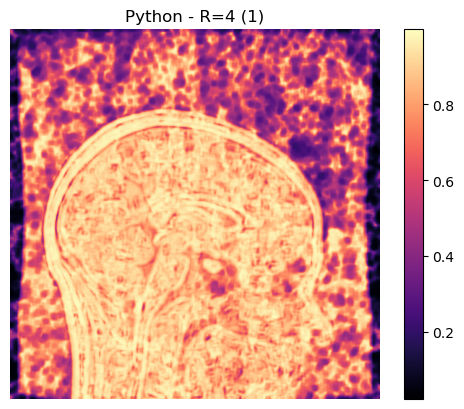

In [ ]:
plt.imshow(np.rot90(S),cmap='magma')
plt.colorbar()
plt.title('Python - R=4 (1)')
plt.axis('off')

plt.imshow(np.rot90(mat['S'][0][0]),cmap='magma')
plt.colorbar()
plt.title('MATLAB - R=4 (1)')
plt.axis('off')